# How to use rescomp

In [1]:
from rescomp import *
from matplotlib import pyplot as plt

Solve lorenz equations and split solution into a training and testing portion

In [2]:
tr_t, ts_t, u = lorenz_equ()

In [3]:
ts_t # Test timesteps

array([39.60166003, 39.60266004, 39.60366006, ..., 59.99799997,
       59.99899998, 60.        ])

Test orbit shape. $(x, y, z)$ positions for 20399 timesteps:

In [4]:
u(ts_t).shape 

(3, 20399)

Plot $x(t)$, $y(t)$, $z(t)$ separately for the training portion of the orbit

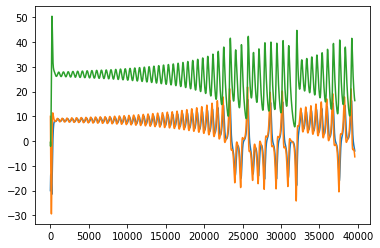

In [5]:
plt.plot(u(tr_t).T)
plt.show()

Make a reservoir computer

In [6]:
rc = ResComp(res_sz=1000)

Drive the node states of the reservoir with the training portion of the orbit

In [7]:
node_states = rc.drive(tr_t, u)

In [8]:
node_states.shape

(39600, 1000)

Plot a reservoir node state. We can see the impact of the driving lorenz orbit

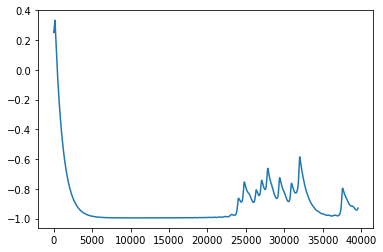

In [9]:
plt.plot(node_states[:,8])

Fit the reservoir to the training portion

In [10]:
error = rc.fit(tr_t,u)
print(error)

0.13092973389039705


Make a prediction about the test orbit

In [11]:
pred = rc.predict(ts_t)
pred.shape

(3, 20399)

Plot the predicition

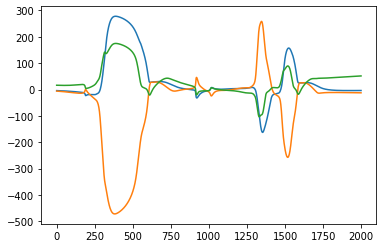

In [12]:
plt.plot(pred[:,:2000].T)
plt.show()

# How to Run Exeriments

In [13]:
from res_experiment import *

Define all parameters. Results save to `FNAME`

In [ ]:
NTRIALS = 2
NORBITS = 2
X0 = random_lorenz_x0
FNAME = "trial.pkl"
NET = "barab1"
REMOVE_P = 0.1

DIFF_EQ_PARAMS = {
                  "x0": [-20, 10, -.5],
                  "begin": 0,
                  "end": 60,
                  "timesteps":60000,
                  "train_per": .66,
                  "solver": lorenz_equ
                 }

RES_PARAMS = {
              "uniform_weights": True,
              "solver": "ridge",
              "ridge_alpha": .0001,
              "signal_dim": 3,
              "network": "random graph",

              "res_sz": 15,
              "activ_f": np.tanh,
              "connect_p": .4,
              "spect_rad": .9,
              "gamma": 2.,
              "sigma": 0.12,
              "sparse_res": True,
             }

Run experiment

In [15]:
experiment(
    FNAME, 
    NET, 
    RES_PARAMS, 
    DIFF_EQ_PARAMS, 
    ntrials=NTRIALS, 
    norbits=NORBITS, 
    x0=X0,
    remove_p=REMOVE_P
)

Net complete-- 
	Net: barab1 
	Percent 0.1
Net complete-- 
	Net: barab1 
	Percent 0.1


In [16]:
import pickle

Load Results

In [19]:
fstream = open("trial.pkl", 'rb')
res_dict = pickle.load(fstream)
fstream.close()
res_dict

{0: {'pred': [3686, 2256],
  'err': [0.03345630465306923, 0.02914207302335424],
  'adj': <3438x3438 sparse matrix of type '<class 'numpy.int64'>'
  	with 6187 stored elements in Dictionary Of Keys format>,
  'net': 'barab1',
  'gamma': 2.0,
  'sigma': 0.12,
  'spect_rad"': 0.9,
  'ridge_alpha': 0.0001,
  'remove_p': 0.1},
 1: {'pred': [4204, 5574],
  'err': [0.0415462605268264, 0.03143868131562314],
  'adj': <2420x2420 sparse matrix of type '<class 'numpy.int64'>'
  	with 4355 stored elements in Dictionary Of Keys format>,
  'net': 'barab1',
  'gamma': 2.0,
  'sigma': 0.12,
  'spect_rad"': 0.9,
  'ridge_alpha': 0.0001,
  'remove_p': 0.1}}